<h1 align=center><font size = 5> Regresión Logística con Python</font></h1>

Aquí aprenderás Regresión Logística, para luego, crear un modelo basado en datos de telecomunicaciones para predecir cuándo los clientes buscarán otro competidor de forma tal de poder tomar alguna decisión para retenerlos.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
df = pd.read_csv('../Datasets/ChurnData.csv', sep = ',')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [5]:
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']]
df['churn'].astype('int')

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    0
Name: churn, Length: 200, dtype: int32

## Práctica

¿Cuántas filas y columnas en total hay en este set de datos? ¿Cual es el nombre de las columnas?

In [6]:
df.shape

(200, 10)

In [7]:
X = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']]
y = df['churn']

<AxesSubplot: xlabel='age', ylabel='Count'>

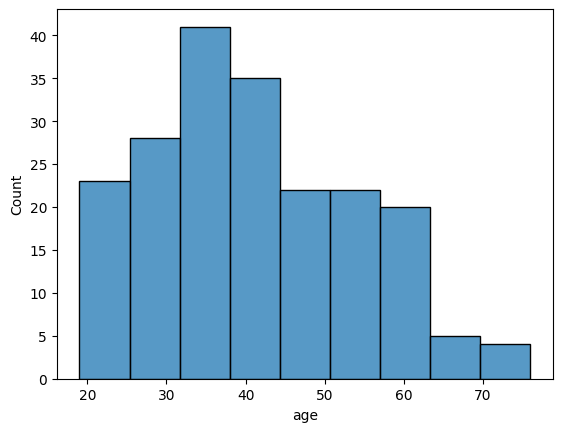

In [12]:
sns.histplot(df['age'])

In [8]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X)
X = std.transform(X)

#### Dividimos en Train/Test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
print('Shape del Train set:', X_train.shape, y_train.shape)
print('Shape del Test set:', X_test.shape, y_test.shape)

Shape del Train set: (140, 9) (140,)
Shape del Test set: (60, 9) (60,)


#### Modelamos

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 0.01, solver = 'liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [14]:
y_pred = lr.predict(X_test)
y_test_proba = lr.predict_proba(X_test)

### Medimos atraves del indice de Jaccard

In [17]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred)

0.35714285714285715

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función muestra y dibuja la matriz de confusión.
    La normalización se puede aplicar estableciendo el valor `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[10  5]
 [13 32]]


Matriz de confusión sin normalización
[[10  5]
 [13 32]]


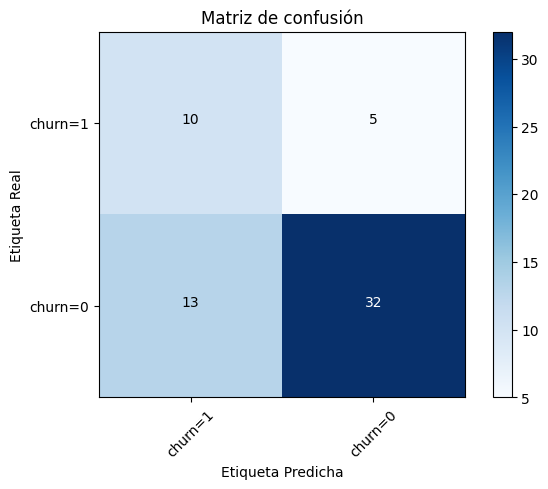

In [19]:
# Calcular la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Dibujar la matriz de confusión no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Matriz de confusión')

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.71      0.78        45
         1.0       0.43      0.67      0.53        15

    accuracy                           0.70        60
   macro avg       0.65      0.69      0.65        60
weighted avg       0.76      0.70      0.72        60

